In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Reading an image from a file

We can do this using the `imread()` function from the `matplotlib` library. The argument to `imread()` should be the file name if the file is in the same directory as the notebook. Otherwise, you will have to provide the full path to the file.

In [2]:
pic = plt.imread('uppsala.ppm')

When we have read the image, it is now just an ordinary NumPy array.

In [3]:
type(pic)

numpy.ndarray

The entries themselves are of the type `uint8`, which means that they are unsigned 8-bit integers. This means that they are all between 0 and 255 all arithmetic on them are done modulo 255.

In [4]:
# pic is an array of uint8:s (unsigned 8-bit ingers. i.e. [0,255])
pic.dtype

dtype('uint8')

We can see the modular artithmetic with some examples. This is a potential source of bugs, so we have to keep this in mind.

In [5]:
a = np.uint8(200)
b = np.uint8(134)
print(f'a + b = {a+b}')

a + b = 78


/home/emil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


We can check how many rows, columns, and "layers" the matrix has. ("Layers" for want of a better word.)

In [6]:
pic.shape

(1536, 2312, 3)

The first dimension is the rows, the second is the columns, and the third is the RGB values

<IPython.core.display.Javascript object>


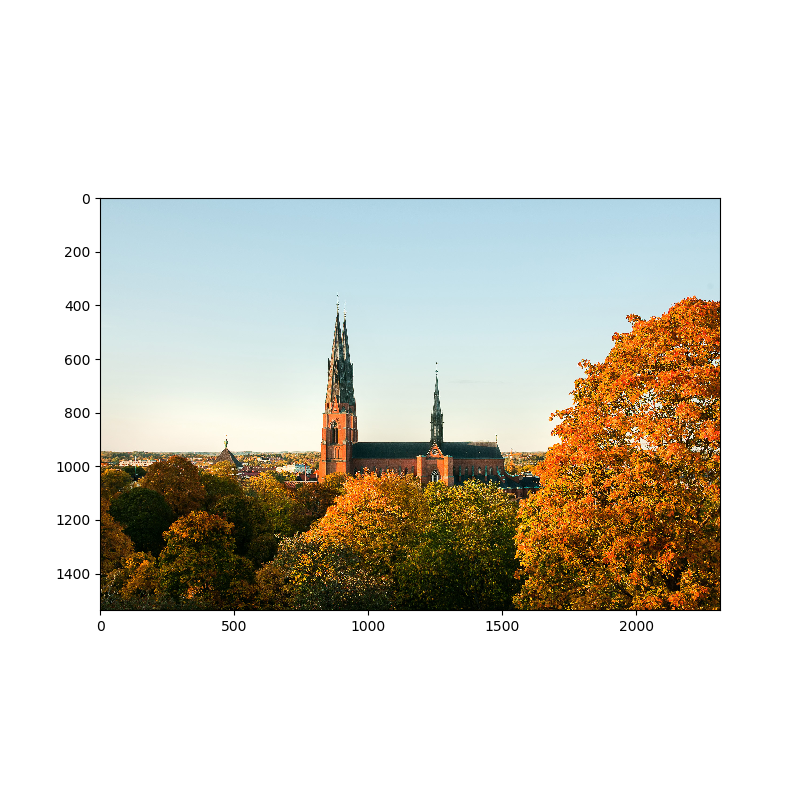

In [7]:
plt.figure(figsize=(8,8))

plt.imshow(pic)

We will create a smaller picture by slicing the original.

<IPython.core.display.Javascript object>


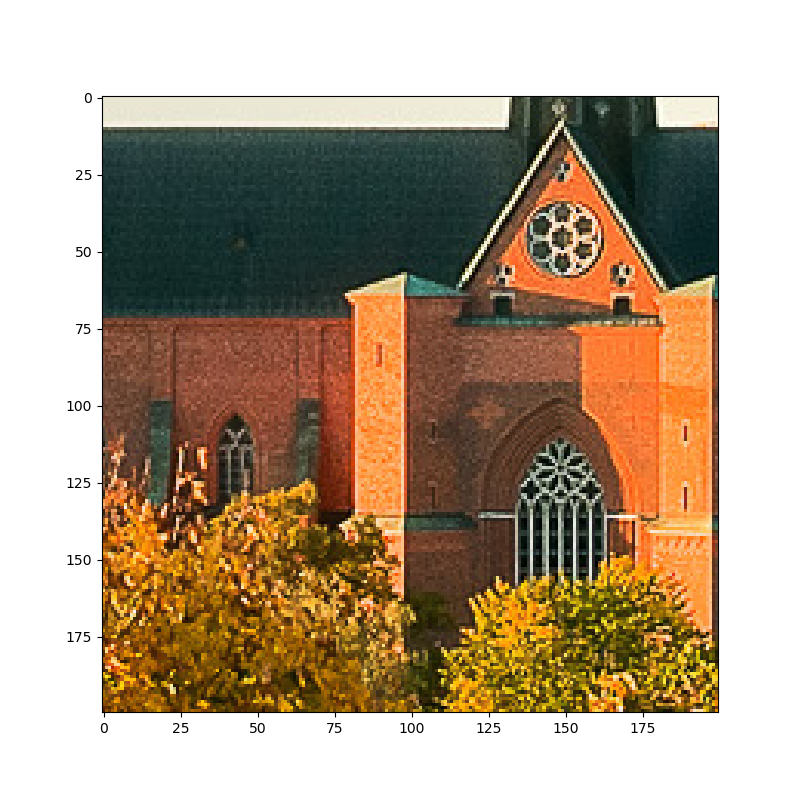

In [8]:
smallpic = pic[900:1100, 1100:1300,:]
plt.figure(figsize=(8,8))
#plt.figure()
plt.imshow(smallpic)

In [9]:
smallpic.shape

(200, 200, 3)

We will now see that we can make the image darker by multiplying each entry by a coefficient smaller than 1. When we multiply a `uint8` (or any integer) by a floating point value, the result is also a float, so we have to cast it back to a `uint8` after the multiplication.

<IPython.core.display.Javascript object>


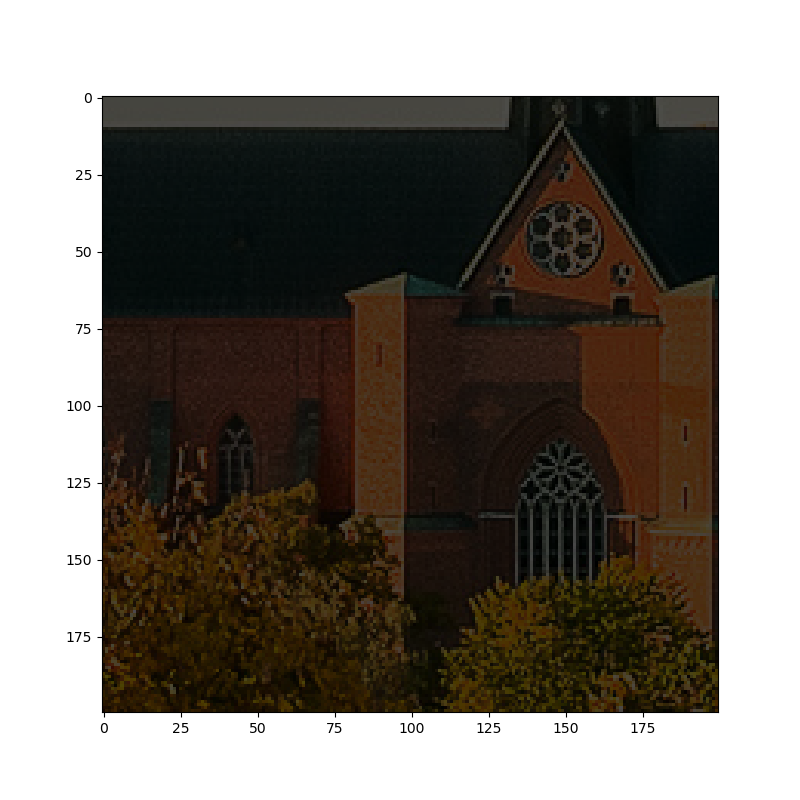

In [10]:
# change the intesity of the image by making it darker
coeff = 0.3
darker = smallpic.copy()
for i in range(darker.shape[0]):
    for j in range(darker.shape[1]):
        for k in range(3):
            darker[i][j][k] = np.uint8(smallpic[i][j][k] * coeff)

plt.figure(figsize=(8,8))
#plt.figure()
plt.imshow(darker)
        

A quicker way to do this, is by not looping through the pixels one by one, but apply the operation to the whole matrix. The time difference is not so noticable here, but if we tried the nested loop on the original picture with its millions of pixels, it would take a really long time.

<IPython.core.display.Javascript object>


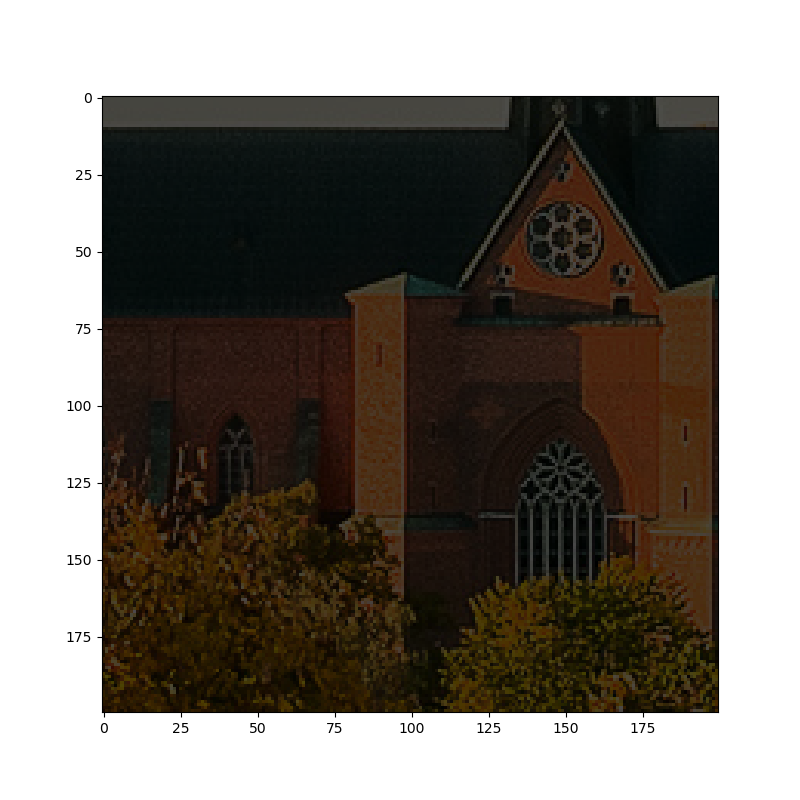

In [11]:
darker2 = np.uint8(smallpic * coeff)
plt.figure(figsize=(8,8))
plt.imshow(darker2)

We can change the intensity to make it lighter as well by multiplying by a coefficient larger than 1. Before we convert the result of the multiplication back to a `uint8` we need to make sure that it is not greater than 255. We can see a better way of doing this shortly, but for the time being we will use the nested loop approach. (Because applying the `min` function directly to the array does not work the way we want.)

<IPython.core.display.Javascript object>


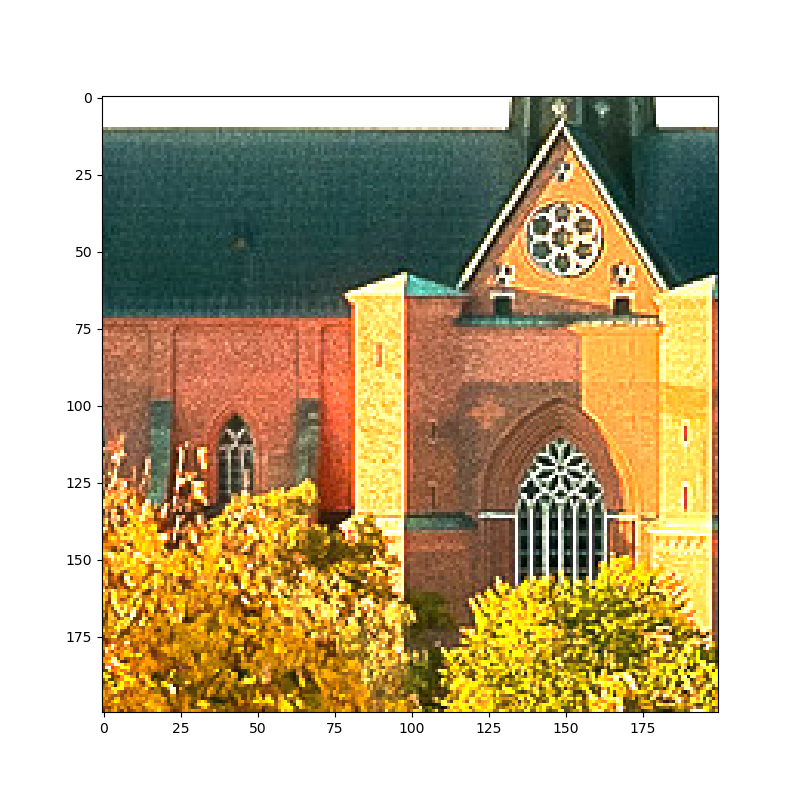

In [12]:
# change the intesity of the image by making it lighter
coeff = 1.5
lighter = smallpic.copy()
for i in range(lighter.shape[0]):
    for j in range(lighter.shape[1]):
        for k in range(3):
            lighter[i][j][k] = np.uint8(min(smallpic[i][j][k] * coeff, 255))


plt.figure(figsize=(8,8))
#plt.figure()
plt.imshow(lighter)
        